# SPAM HAM Classifiers using ML 

Aneequa Narmeen M

In [33]:
#importing the necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#read the data 

df=pd.read_csv('emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [35]:
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [36]:
df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [37]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [39]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5723    False
5724    False
5725    False
5726    False
5727    False
Length: 5728, dtype: bool

# Visualise the Data 

In [40]:
ham = df[df['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [41]:
spam = df[df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [42]:
print('Spam Percentage =',(len(spam)/len(df))*100,'%')

Spam Percentage = 23.88268156424581 %


In [43]:
print('Ham Percentage =',(len(ham)/len(df))*100,'%')

Ham Percentage = 76.11731843575419 %


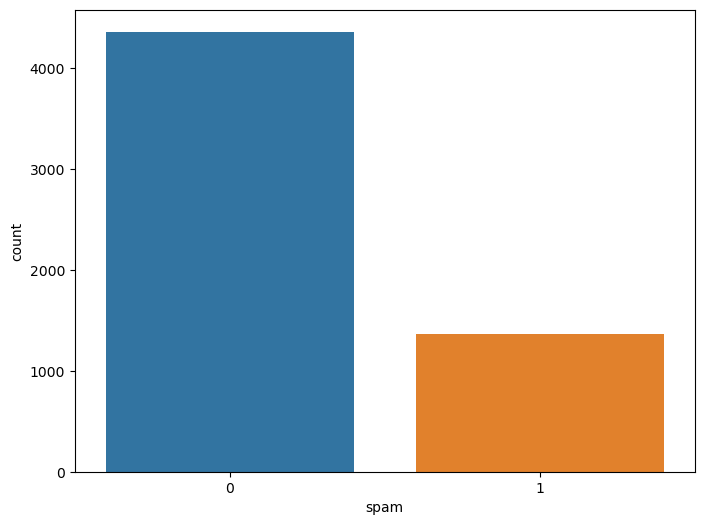

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data = df, label='Spam vs Ham')
plt.show()

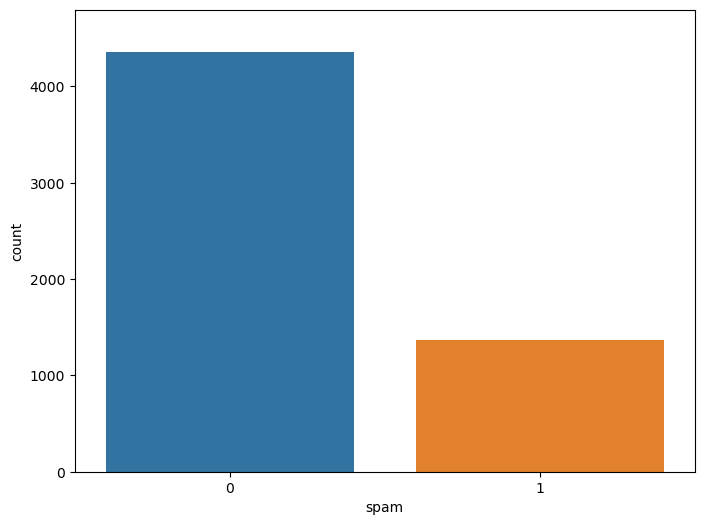

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=df, label='Spam vs Ham')
plt.ylim(0, df['spam'].value_counts().max() * 1.1)
plt.show()

# Applying CountVectorizer 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
spamham_countVectorizer = vectorizer.fit_transform(df['text'])
feature_names = vectorizer.get_feature_names_out()



In [55]:
print("Feature names:")
print(feature_names)

Feature names:
['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [56]:
print("\nTransformed data shape:", spamham_countVectorizer.shape)
print("\nTransformed data (first 5 rows):")
print(spamham_countVectorizer[:5])


Transformed data shape: (5728, 37303)

Transformed data (first 5 rows):
  (0, 32371)	1
  (0, 23381)	1
  (0, 18838)	1
  (0, 37024)	7
  (0, 10045)	1
  (0, 17688)	1
  (0, 21148)	1
  (0, 18848)	3
  (0, 28018)	1
  (0, 16655)	1
  (0, 33798)	4
  (0, 28142)	1
  (0, 9281)	3
  (0, 33450)	5
  (0, 21665)	2
  (0, 15415)	1
  (0, 24274)	4
  (0, 32635)	1
  (0, 4836)	5
  (0, 18234)	1
  (0, 18885)	1
  (0, 7546)	2
  (0, 16072)	2
  (0, 8043)	1
  (0, 20960)	3
  :	:
  (4, 5274)	2
  (4, 4518)	2
  (4, 36487)	1
  (4, 16757)	1
  (4, 15334)	1
  (4, 22785)	1
  (4, 15822)	1
  (4, 31343)	2
  (4, 8141)	1
  (4, 9298)	1
  (4, 4354)	1
  (4, 16223)	1
  (4, 16327)	1
  (4, 24377)	1
  (4, 4585)	1
  (4, 22000)	1
  (4, 6513)	1
  (4, 36966)	1
  (4, 34048)	1
  (4, 14744)	1
  (4, 7585)	2
  (4, 10898)	1
  (4, 9173)	1
  (4, 13227)	1
  (4, 21705)	1


In [54]:
spamham_countVectorizer.shape

(5728, 37303)

# Assessing the model accuracy 
Split data into training and test sets
The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. 

Here I will Split the available data into a training set and a testing set. (80% training, 20% test)


In [57]:
label = df['spam']

X = spamham_countVectorizer
y = label

In [58]:
X.shape

(5728, 37303)

In [59]:
y.shape

(5728,)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)

# Multinomial NB 

The multinomial model provides an ability to classify data, that cannot be represented numerically. Its main advantage is the significantly reduced complexity.

Here we will import multinomial nb 

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

# Evaluating The Model 

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 1, 1, 1])

# Confusion matrix
using scikit-learn's metrics module to calculate accuracy measures and create a confusion matrix. 


In [79]:
cm = confusion_matrix(y_train,y_predict_train)

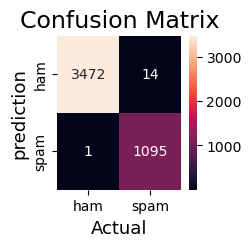

In [80]:

plt.figure(figsize = (2,2))
sns.heatmap(cm,annot = True,fmt = 'g', xticklabels = ['ham','spam'], yticklabels = ['ham','spam'])
plt.ylabel('prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

In [86]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3486
           1       0.99      1.00      0.99      1096

    accuracy                           1.00      4582
   macro avg       0.99      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



In [71]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 1, 0, ..., 0, 0, 1])

In [81]:
cm=confusion_matrix(y_test,y_predict_test)


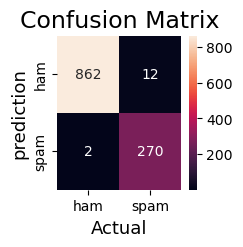

In [82]:
plt.figure(figsize = (2,2))
sns.heatmap(cm,annot = True,fmt = 'g', xticklabels = ['ham','spam'], yticklabels = ['ham','spam'])
plt.ylabel('prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

In [83]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       874
           1       0.96      0.99      0.97       272

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



# Observation 

There are two possible predicted classes:
    "Ham" (0) and "Spam" (1).
    The classifier made a total of 1,146 predictions.
    Out of those 1,146 cases, the classifier predicted "Ham" 874 times and "Spam" 272 times.
    In reality, there are 272 instances of "Spam" (1) and 874 instances of "Ham" (0) in the dataset.

The overall accuracy of the classifier is 99%, meaning the classifier correctly predicted the class of the messages in 99% of cases.